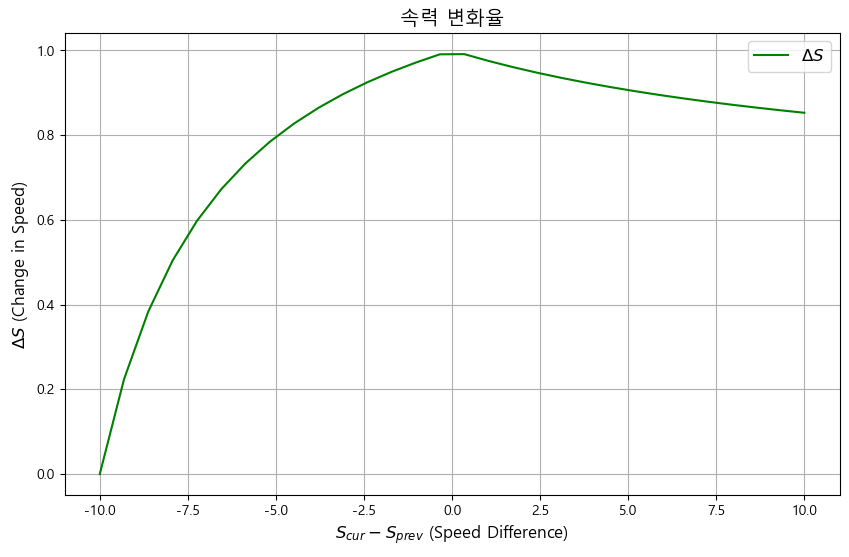

In [291]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
# 한글 및 마이너스 기호 설정
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우 '맑은 고딕' 설정

# Speed values (linearly increasing)
S_prev = np.arange(10, 70, 2)  # Previous speeds

# Adjust S_cur to ensure the difference (S_cur - S_prev) is at most 30
S_cur = S_prev + np.linspace(-10, 10, len(S_prev))  # Adjusted current speeds with max difference ±15

# Calculate ΔS
delta_S = np.where(S_prev != 0, 1 - np.abs(S_cur - S_prev) / S_prev, 0)

# Calculate absolute difference
abs_delta_S = S_cur - S_prev

# Plot ΔS vs (S_cur - S_prev)
plt.figure(figsize=(10, 6))
plt.plot(abs_delta_S, delta_S, label="$\\Delta S$", color="green")
plt.title("속력 변화율", fontsize=14)
plt.xlabel("$S_{cur} - S_{prev}$ (Speed Difference)", fontsize=12)
plt.ylabel("$\\Delta S$ (Change in Speed)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


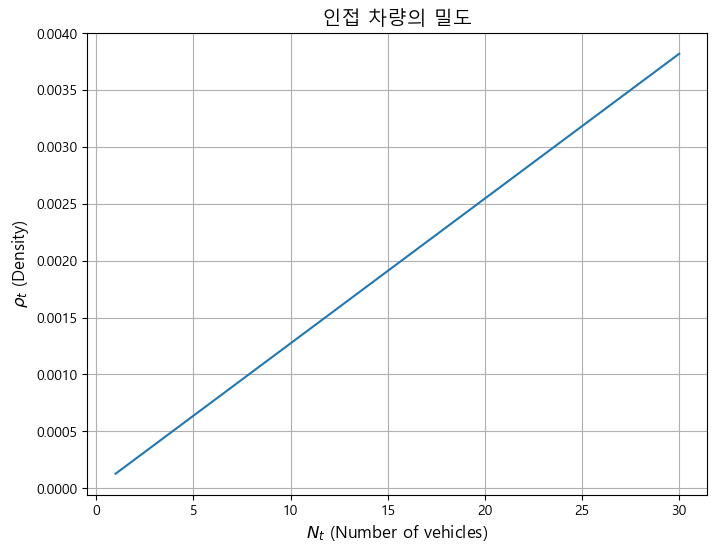

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters
R = 50  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30

# Calculate density
rho_t = N_t / (np.pi * R**2)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(N_t, rho_t)
plt.title("인접 차량의 밀도", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$\\rho_t$ (Density)", fontsize=12)
plt.grid()
plt.show()


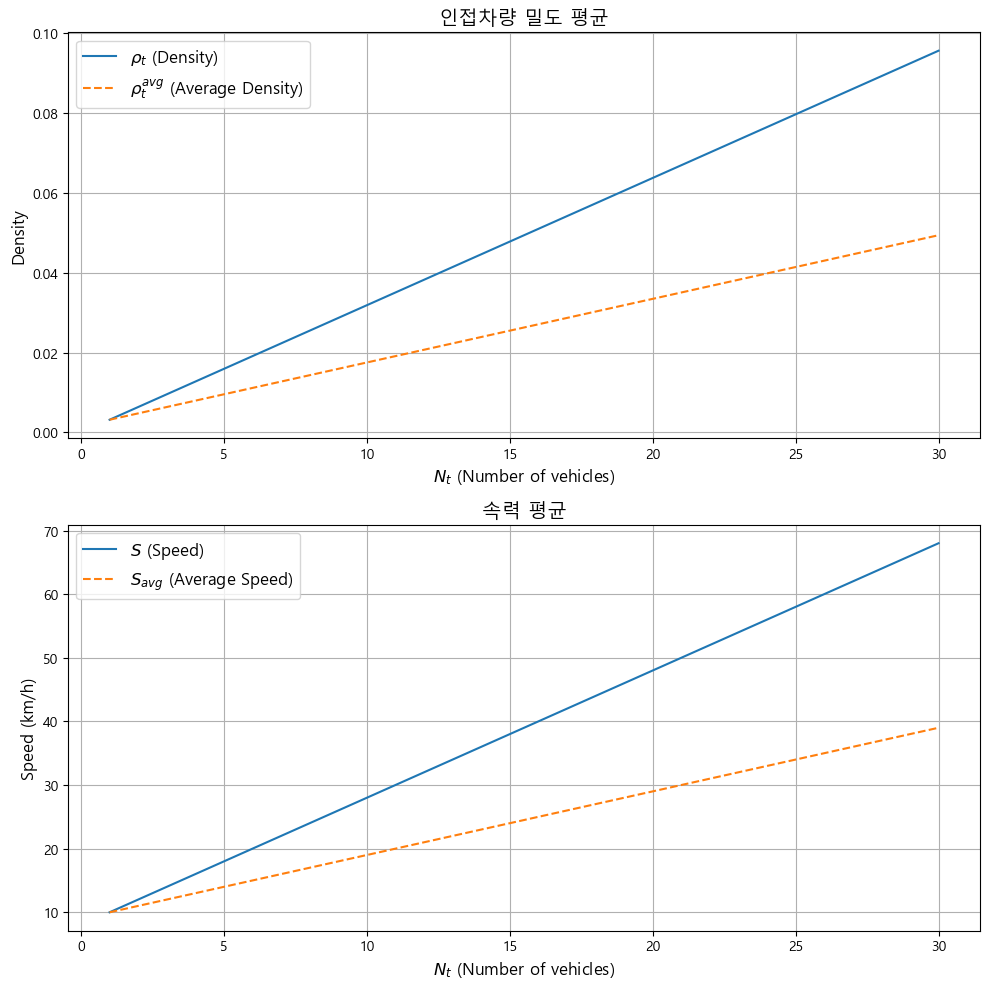

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters
R = 10  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
S = np.arange(10, 71, 2)  # Speeds from 10 to 70 (step of 2)

# Ensure S matches the length of N_t (if required, resize or repeat)
S = S[:len(N_t)]

# Calculate density
rho_t = N_t / (np.pi * R**2)

# Calculate average density
rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)

# Calculate average speed
S_avg = np.cumsum(S) / np.arange(1, len(S) + 1)

# Create two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# First plot: Density and Average Density
axs[0].plot(N_t, rho_t, label="$\\rho_t$ (Density)")
axs[0].plot(N_t, rho_t_avg, label="$\\rho_t^{avg}$ (Average Density)", linestyle="--")
axs[0].set_title("인접차량 밀도 평균", fontsize=14)
axs[0].set_xlabel("$N_t$ (Number of vehicles)", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)
axs[0].legend(fontsize=12)
axs[0].grid()

# Second plot: Speed and Average Speed
axs[1].plot(N_t, S, label="$S$ (Speed)")
axs[1].plot(N_t, S_avg, label="$S_{avg}$ (Average Speed)", linestyle="--")
axs[1].set_title("속력 평균", fontsize=14)
axs[1].set_xlabel("$N_t$ (Number of vehicles)", fontsize=12)
axs[1].set_ylabel("Speed (km/h)", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


[ 0.          2.68965517  5.37931034  8.06896552 10.75862069 13.44827586
 16.13793103 18.82758621 21.51724138 24.20689655 26.89655172 29.5862069
 32.27586207 34.96551724 37.65517241 40.34482759 43.03448276 45.72413793
 48.4137931  51.10344828 53.79310345 56.48275862 59.17241379 61.86206897
 64.55172414 67.24137931 69.93103448 72.62068966 75.31034483 78.        ]


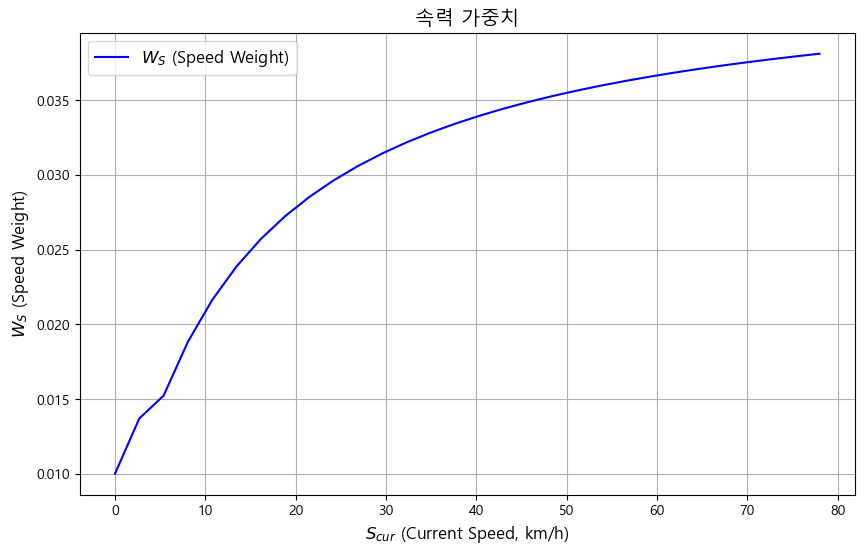

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
# Parameters
W_base_S = 0.0037  # 기본 속도 가중치
F_S = 0.3  # 민감도 계수
F_change = 0.03  # 보정 계수
W_min = 0.01  # Minimum limit for W_S
W_max = 0.10  # Maximum limit for W_S

# Given data
S_prev = np.arange(10, 70, 2)  # Previous speeds (10, 12, ..., 68)
S_cur = np.clip(S_prev + np.linspace(-10, 10, len(S_prev)), 0, None)  # Current speeds, adjusted and clipped to 0 or higher
S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)  # Average speed
delta_S = np.where(S_prev != 0, (S_cur - S_prev) / S_prev, 0)  # Speed change ratio

print(S_cur)

# Calculate W_S
W_S = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum((S_cur - S_avg) * F_S, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S * F_change, 0.02)
    ),
    W_min, W_max
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S_cur, W_S, label="$W_S$ (Speed Weight)", color="blue")
plt.title("속력 가중치", fontsize=14)
plt.xlabel("$S_{cur}$ (Current Speed, km/h)", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


49.0
[-19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.   1.   3.   5.   7.
   9.  11.  13.  15.  17.  19.]
[0.0130767  0.01236932 0.01161895 0.01081665 0.00994987 0.009
 0.00793725 0.0067082  0.00519615 0.003      0.003      0.00519615
 0.0067082  0.00793725 0.009      0.00994987 0.01081665 0.01161895
 0.01236932 0.0130767 ]


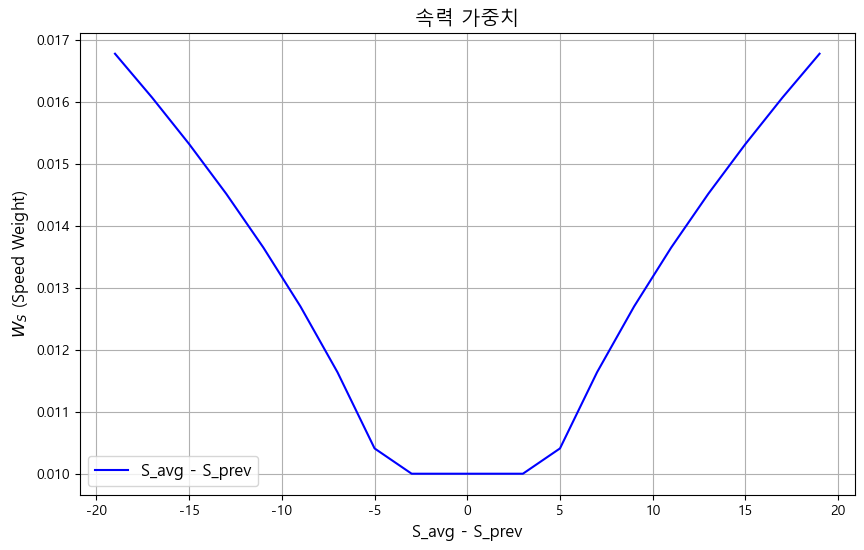

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import platform
import math
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
# Parameters
W_base_S = 0.0037  # 기본 속도 가중치
F_S = 0.003  # 민감도 계수
F_change = 0.03  # 보정 계수
W_min = 0.01  # Minimum limit for W_S
W_max = 0.10  # Maximum limit for W_S

# Given data
S_prev = np.arange(30, 70, 2)  # Previous speeds (10, 12, ..., 68)
#S_cur = np.clip(S_prev + np.linspace(-10, 10, len(S_prev)), 0, None)  # Current speeds, adjusted and clipped to 0 or higher
S_cur = np.arange(30, 70, 2)
#S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)  # Average speed
S_avg = np.mean(S_cur)

delta_S = np.where(S_prev != 0, (S_cur - S_prev) / S_prev, 0)  # Speed change ratio

print(S_avg)
print(S_cur - S_avg)

W_S = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur - S_avg)) * F_S, 0.03)  # sqrt applied here
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S * F_change, 0.02)
    ),
    W_min, W_max
)

diff = S_avg - S_cur
a = np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur - S_avg)) * F_S, 0.03)  # sqrt applied here
    )

print(a)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(diff, W_S, label="S_avg - S_prev", color="blue")
plt.title("속력 가중치", fontsize=14)
plt.xlabel("S_avg - S_prev", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


49.0
[-19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.   1.   3.   5.   7.
   9.  11.  13.  15.  17.  19.]
[0.0130767  0.01236932 0.01161895 0.01081665 0.00994987 0.009
 0.00793725 0.0067082  0.00519615 0.003      0.003      0.00519615
 0.0067082  0.00793725 0.009      0.00994987 0.01081665 0.01161895
 0.01236932 0.0130767 ]


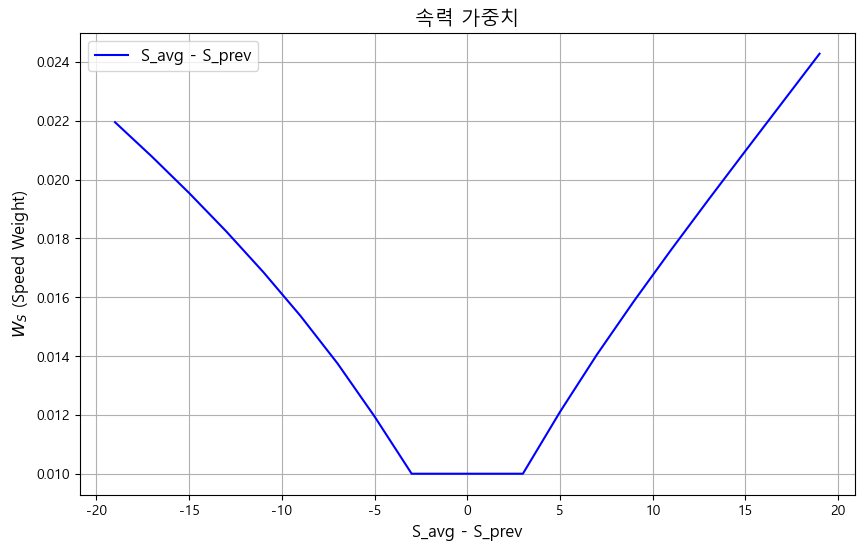

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import platform
import math
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
# Parameters
W_base_S = 0.0037  # 기본 속도 가중치
F_S = 0.003  # 민감도 계수
F_change = 0.03  # 보정 계수
W_min = 0.01  # Minimum limit for W_S
W_max = 0.10  # Maximum limit for W_S

#S_cur = np.clip(S_prev + np.linspace(-10, 10, len(S_prev)), 0, None)  # Current speeds, adjusted and clipped to 0 or higher
S_cur = np.arange(30, 70, 2)
#S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)  # Average speed

adjustment = np.linspace(10, -10, len(S_cur))  # Smoothly vary adjustment from +10 to -10
S_prev = S_cur + adjustment  # Transition from above S_cur to below S_cur
S_avg = np.mean(S_cur)

delta_S = np.where(S_prev != 0, np.abs(S_cur - S_prev) / S_prev, 0)  # Speed change ratio

print(S_avg)
print(S_cur - S_avg)

W_S = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur - S_avg)) * F_S, 0.03)  # sqrt applied here
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S * F_change, 0.02)
    ),
    W_min, W_max
)

diff = S_avg - S_cur
a = np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur - S_avg)) * F_S, 0.03)  # sqrt applied here
    )

print(a)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(diff, W_S, label="S_avg - S_prev", color="blue")
plt.title("속력 가중치", fontsize=14)
plt.xlabel("S_avg - S_prev", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


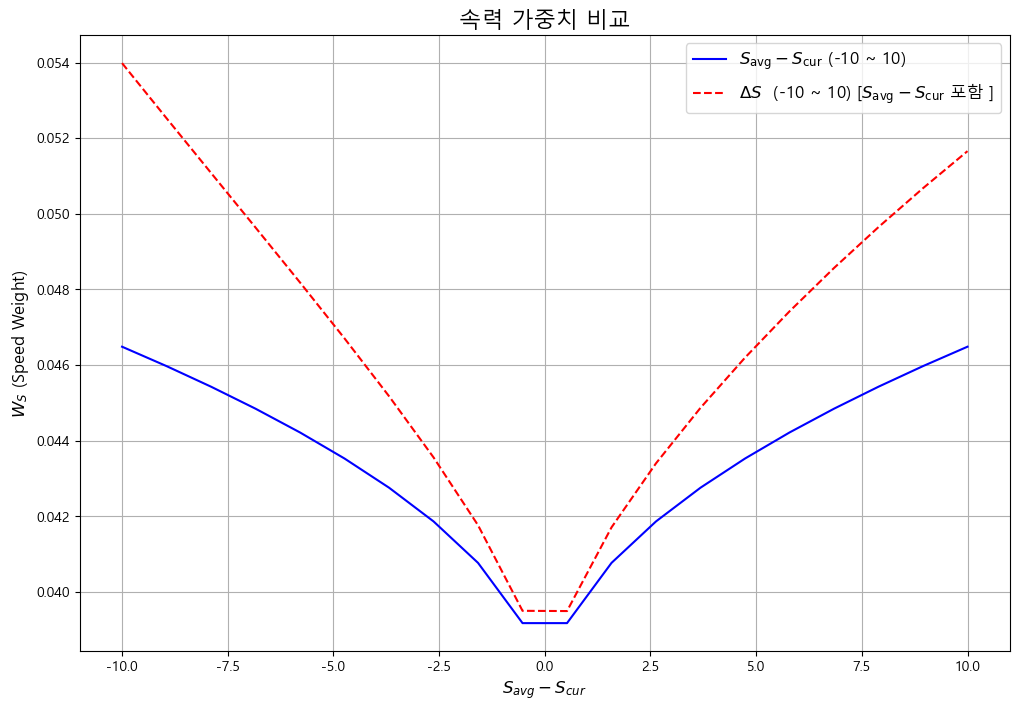

In [293]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

# Font setup for Korean on Windows
if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters
W_base_S = 0.037  # 기본 속도 가중치
F_S = 0.003  # 민감도 계수
F_change = 0.03  # 보정 계수
W_min = 0.01  # Minimum limit for W_S
W_max = 0.10  # Maximum limit for W_S

# Approach 1: Fixed S_prev
S_prev_1 = np.arange(30, 70, 2)
S_cur_1 = np.arange(30, 70, 2)
S_avg_1 = np.mean(S_cur_1)

diff_1 = np.linspace(-10, 10, len(S_cur_1))  # Average speed - current speed from -10 to 10
S_avg_1 = S_cur_1 + diff_1

delta_S_1 = np.where(S_prev_1 != 0, (S_cur_1 - S_prev_1) / S_prev_1, 0)

W_S_1 = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur_1 - S_avg_1)) * F_S, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S_1 * F_change, 0.02)
    ),
    W_min, W_max
)

print(S_avg_1 - S_cur_1)

# Approach 2: Varying S_prev
S_cur_2 = np.arange(30, 70, 2)
adjustment = np.linspace(10, -10, len(S_cur_2))  # Smoothly vary adjustment from +10 to -10
S_prev_2 = S_cur_2 + adjustment
S_avg_2 = np.mean(S_cur_2)

diff_2 = np.linspace(-10, 10, len(S_cur_2))  # Average speed - current speed from -10 to 10
S_avg_2 = S_cur_2 + diff_2

delta_S_2 = np.where(S_prev_2 != 0, np.abs(S_cur_2 - S_prev_2) / S_prev_2, 0)

W_S_2 = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur_2 - S_avg_2)) * F_S, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S_2 * F_change, 0.02)
    ),
    W_min, W_max
)

plt.figure(figsize=(12, 8))

plt.plot(diff_1, W_S_1, label=r"$S_{\text{avg}} - S_{\text{cur}}$ (-10 ~ 10)", color="blue")
plt.plot(diff_2, W_S_2, label=r"$\Delta S$  (-10 ~ 10) [$S_{\text{avg}} - S_{\text{cur}} $ 포함 ]", color="red", linestyle="--")

plt.title("속력 가중치 비교", fontsize=16)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


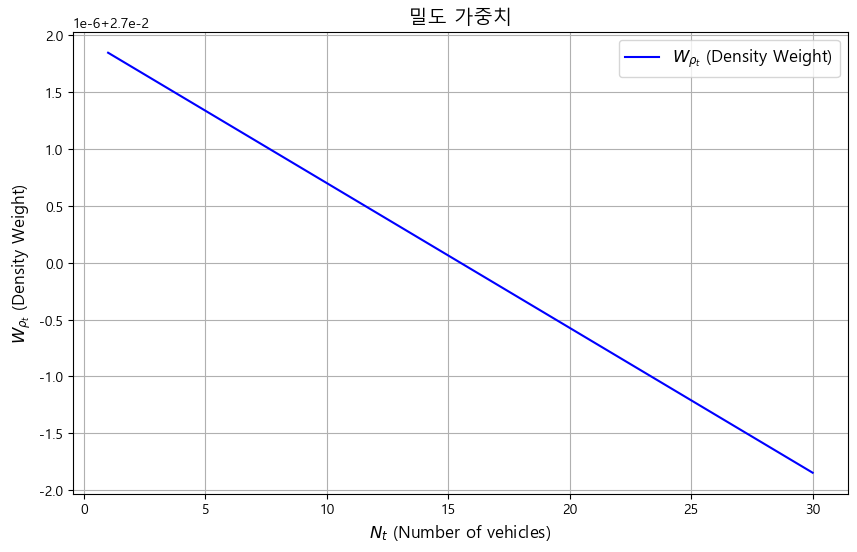

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
# Parameters
W_base_rho = 0.027  # 기본 밀도 가중치
F_rho = -0.001  # 민감도 조정 계수
W_min = 0.01  # Minimum limit for W_rho_t
W_max = 0.10  # Maximum limit for W_rho_t

# Density values
R = 50  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
rho_t = N_t / (np.pi * R**2)  # Current density
#rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)  # Average density
rho_t_avg = np.mean(rho_t)


# Calculate W_rho_t
W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="blue")
plt.title("밀도 가중치", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$W_{\\rho_t}$ (Density Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


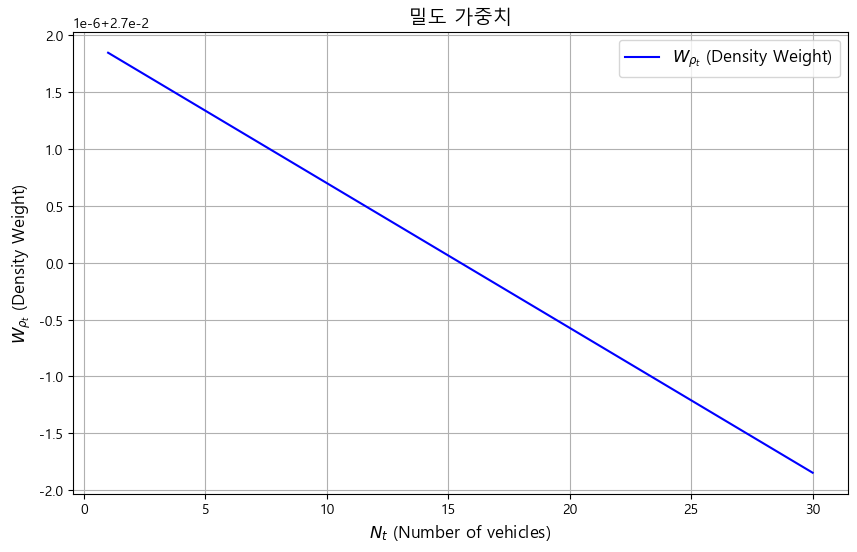

In [223]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
# Parameters
W_base_rho = 0.027  # 기본 밀도 가중치
F_rho = -0.001  # 민감도 조정 계수
W_min = 0.01  # Minimum limit for W_rho_t
W_max = 0.10  # Maximum limit for W_rho_t

# Density values
R = 50  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
rho_t = N_t / (np.pi * R**2)  # Current density
#rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)  # Average density
rho_t_avg = np.mean(rho_t)


# Calculate W_rho_t
W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="blue")
plt.title("밀도 가중치", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$W_{\\rho_t}$ (Density Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


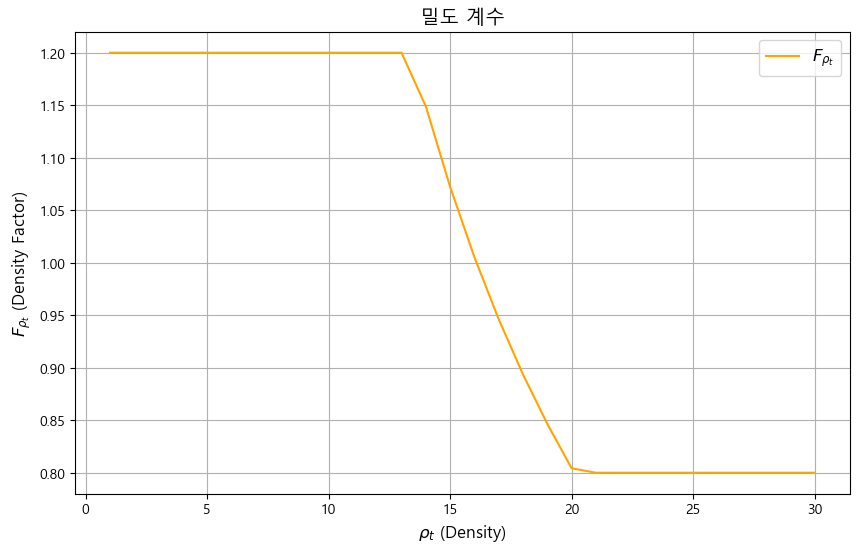

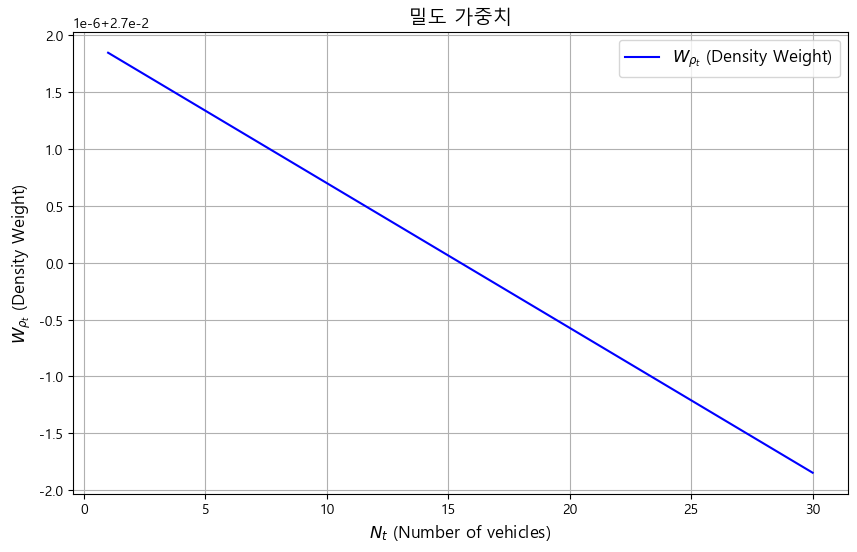

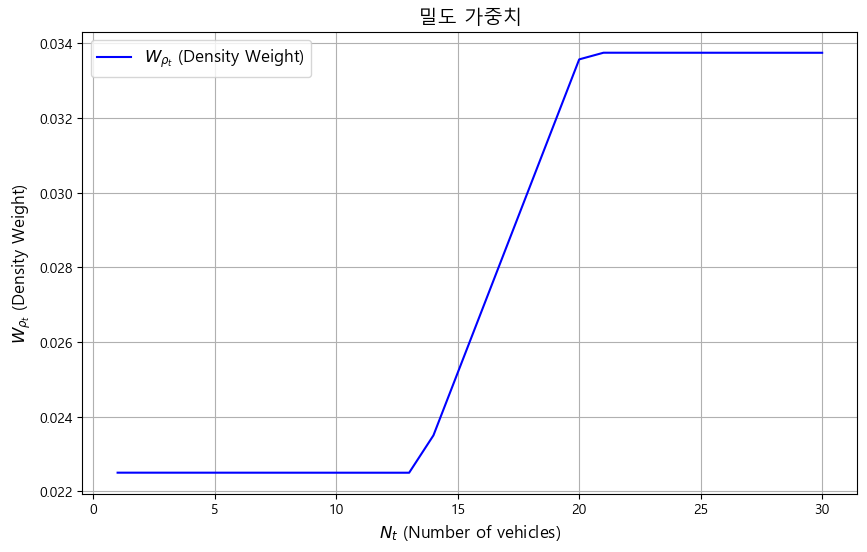

In [248]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Given data
R = 0.8  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
rho_t = N_t / (np.pi * R**2)  # Current density

# Calculate F_rho_t
F_rho_t = np.maximum(0.8, np.minimum(1.2, 8.0 / rho_t))





W_base_rho = 0.027  # 기본 밀도 가중치
F_rho = -0.001  # 민감도 조정 계수
W_min = 0.01  # Minimum limit for W_rho_t
W_max = 0.10  # Maximum limit for W_rho_t

# Density values
R = 50  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
rho_t = N_t / (np.pi * R**2)  # Current density
#rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)  # Average density
rho_t_avg = np.mean(rho_t)


# Calculate W_rho_t
W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

a = W_rho_t / F_rho_t




# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_rho_t, label="$F_{\\rho_t}$", color="orange")
plt.title("밀도 계수", fontsize=14)
plt.xlabel("$\\rho_t$ (Density)", fontsize=12)
plt.ylabel("$F_{\\rho_t}$ (Density Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="blue")
plt.title("밀도 가중치", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$W_{\\rho_t}$ (Density Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_t, a, label="$W_{\\rho_t}$ (Density Weight)", color="blue")
plt.title("밀도 가중치", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$W_{\\rho_t}$ (Density Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()




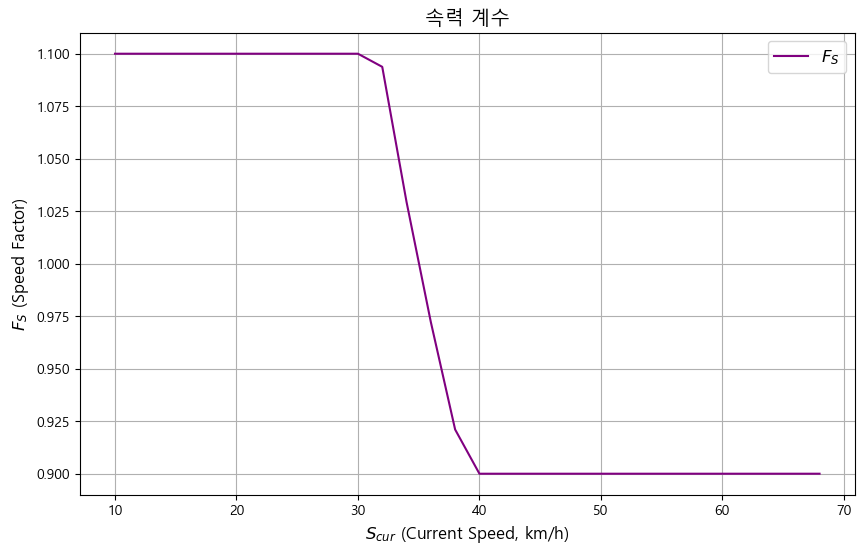

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# 한글 및 마이너스 기호 설정
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우 '맑은 고딕' 설정

# Given data
S_cur = np.arange(10, 70, 2)  # Current speeds

# Calculate F_S
F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S_cur, F_S, label="$F_S$", color="purple")
plt.title("속력 계수", fontsize=14)
plt.xlabel("$S_{cur}$ (Current Speed, km/h)", fontsize=12)
plt.ylabel("$F_S$ (Speed Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


C:\Users\whdgu\AppData\Local\Temp\ipykernel_13980\2911427160.py:22: RuntimeWarning: divide by zero encountered in divide
  F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))  # Sensitivity factor for speed


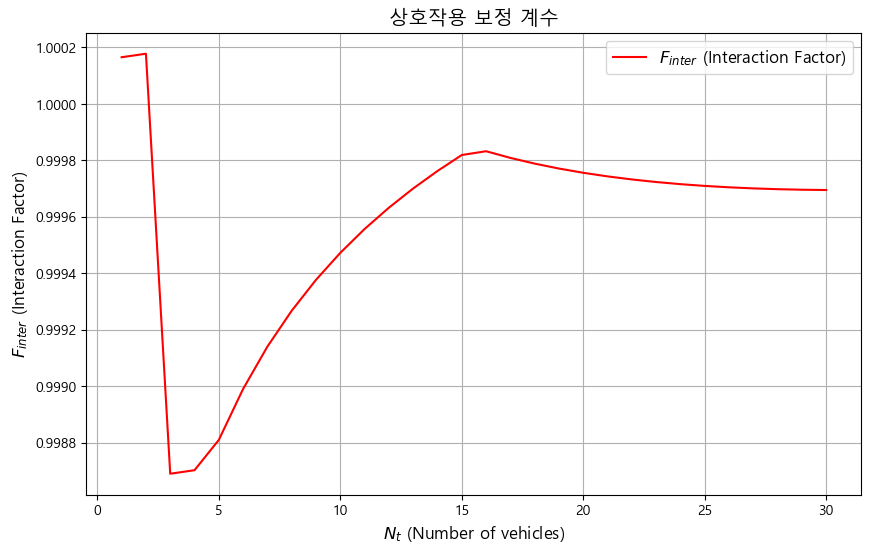

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters and previously calculated values
R = 0.8  # Radius
N_t = np.arange(1, 31)  # Vehicle count
rho_t = N_t / (np.pi * R**2)  # Density
S_prev = np.arange(10, 70, 2)  # Previous speeds
#S_cur = S_prev + np.linspace(-15, 15, len(S_prev))  # Current speeds
S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)  # Average speed
delta_S = np.where(S_prev != 0, np.abs(S_cur - S_prev) / S_prev, 0)  # Speed change ratio

# Parameters for weights
W_base_rho = 0.027
W_base_S = 0.0037
F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))  # Sensitivity factor for speed
F_change = 0.03

# Calculate W_rho_t and W_S
W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum(np.abs(S_cur - S_avg) * F_S, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)

# Calculate F_inter
F_inter = 1.0 + (W_rho_t - W_S) * 0.05

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_inter, label="$F_{inter}$ (Interaction Factor)", color="red")
plt.title("상호작용 보정 계수", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$F_{inter}$ (Interaction Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


C:\Users\whdgu\AppData\Local\Temp\ipykernel_13980\3667718068.py:33: RuntimeWarning: divide by zero encountered in divide
  F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))


[0.0737     0.0737     0.0762197  0.08216336 0.08678621 0.08945023
 0.08913816 0.08798989 0.08465195 0.08131402 0.07797609 0.07463816
 0.07130023 0.06277344 0.05485802 0.05245655 0.05518759 0.05791862
 0.06064966 0.06338069 0.06611172 0.06884276 0.07157379 0.07430483
 0.07703586 0.0783     0.0783     0.0783     0.0783     0.0783    ]
[0.03180554 0.03120871 0.03061188 0.03001504 0.02941821 0.02882138
 0.02822455 0.02762772 0.02703089 0.02643406 0.02583723 0.0252404
 0.02464356 0.02302325 0.02095503 0.01914534 0.01754856 0.0161292
 0.01485924 0.01371628 0.01324594 0.01284806 0.01245017 0.01205228
 0.01165439 0.01125651 0.01085862 0.01046073 0.01006285 0.00966496]
[0.067      0.067      0.06929064 0.07469397 0.07889655 0.08131839
 0.08103469 0.0799908  0.07695632 0.07392184 0.07088736 0.06785287
 0.06481839 0.06178391 0.05874943 0.05828506 0.06131954 0.06435402
 0.06738851 0.07042299 0.07345747 0.07649195 0.07952644 0.08256092
 0.0855954  0.087      0.087      0.087      0.087      0.087 

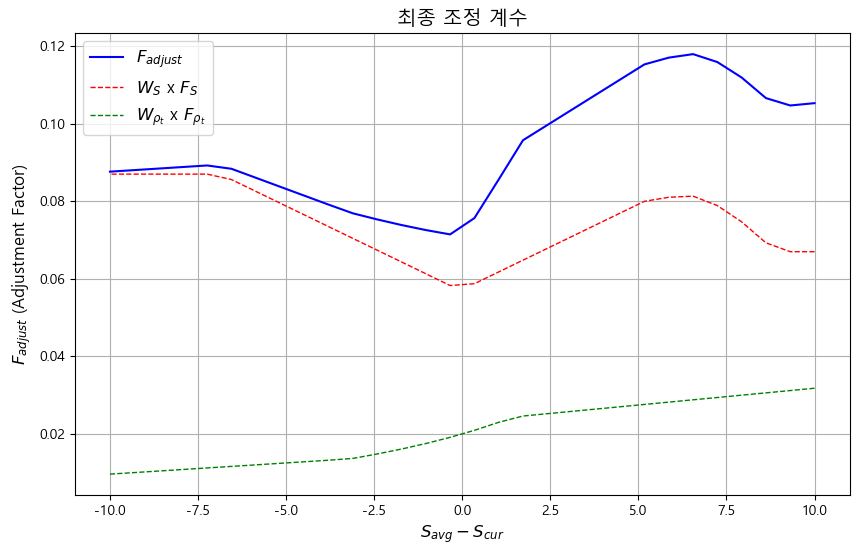

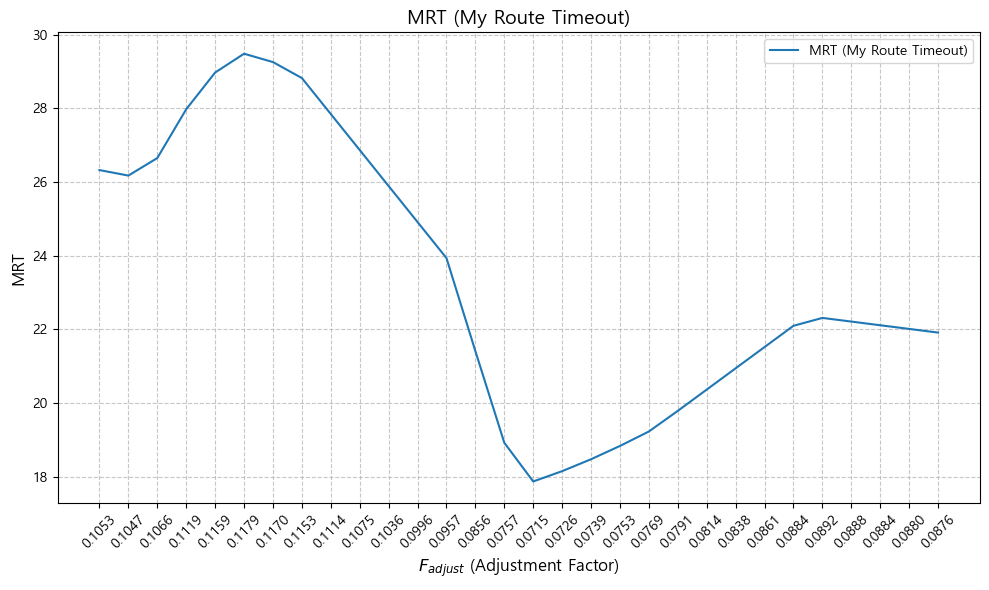

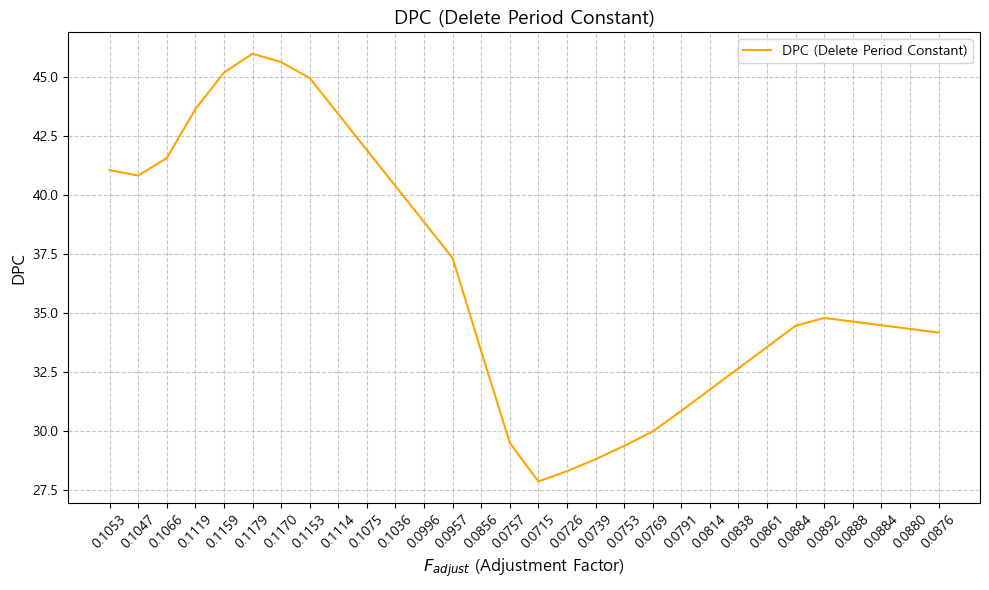

In [305]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

MRT_min = 5.0
MRT_max = 300.0
MRT_base = 250.0


DPC_min = 5.0
DPC_max = 500.0
DPC_base = 390.0


R = 0.8
N_t = np.arange(1, 31)
rho_t = N_t / (np.pi * R**2)
S_prev = np.arange(10, 70, 2)
S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
#S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)
S_avg = np.mean(S_cur)
delta_S = np.where(S_prev != 0, 1 - (np.abs(S_cur - S_prev) / S_prev), 0)

W_base_rho = 0.027
W_base_S = 0.037
F_change = 0.03
F_rho = -0.001

F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur)) 

diff = np.linspace(10, - 10, len(S_cur))


W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum(np.abs(rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum(np.abs(S_cur - S_avg) * 0.001, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)

F_rho_t = np.maximum(0.8, np.minimum(1.2, 8.0 / rho_t))

F_inter = 1.0 + (W_rho_t - W_S) * 0.05
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter

#print(W_S)
#print(W_rho_t)

#print(F_S)
#print(F_rho_t)

print(W_S * F_S)
print(W_rho_t * F_rho_t)

print(W_S)
print(F_S)

a = W_S #* F_S
b = W_rho_t * F_rho_t

# Plot
plt.figure(figsize=(10, 6))
plt.plot(diff, F_adjust, label="$F_{adjust}$", color="blue")


#plt.plot(N_t, W_S, label="$W_S$ (Speed Weight)", color="red", linestyle="--", linewidth=1)
#plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="green", linestyle="--", linewidth=1)

plt.plot(diff, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(diff, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)




plt.title("최종 조정 계수", fontsize=14)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

# Set custom X-axis labels with 4 decimal places
plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()



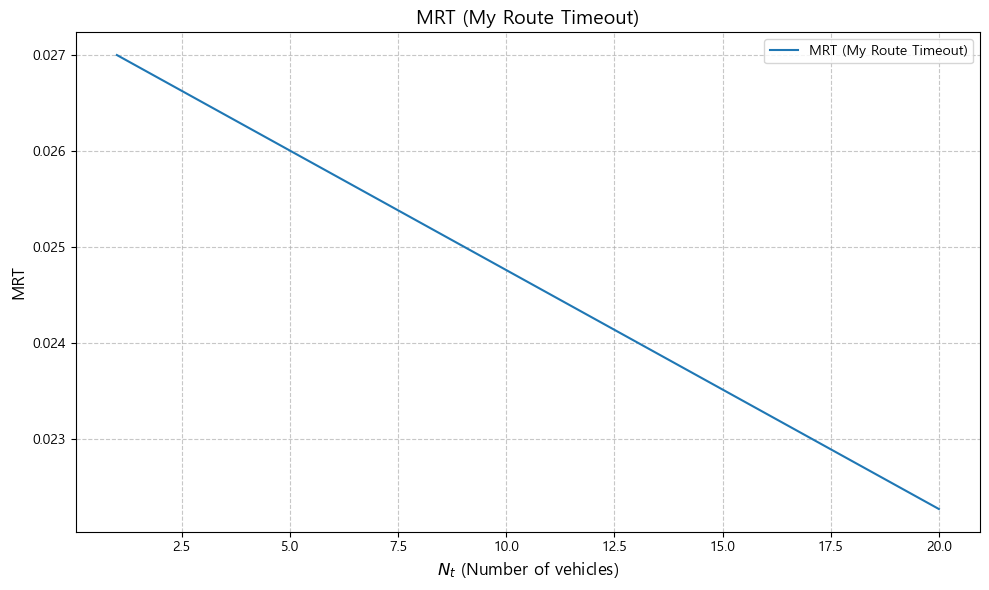

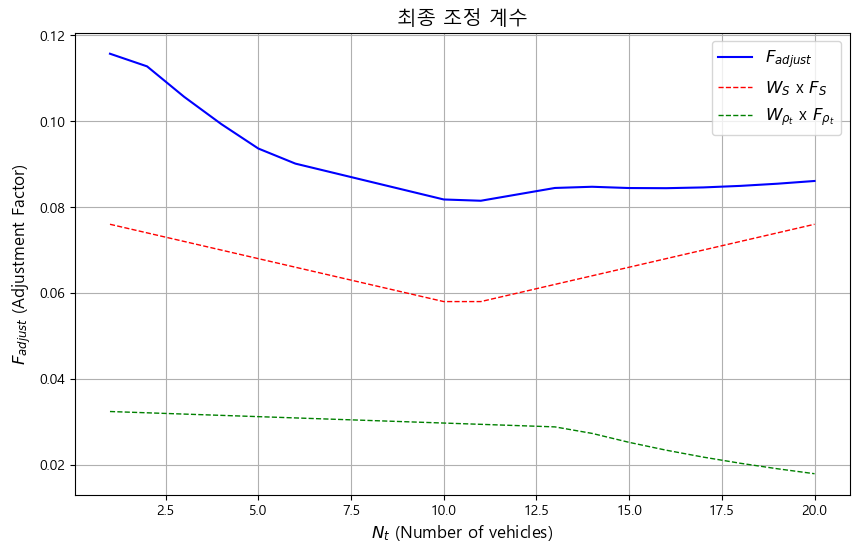

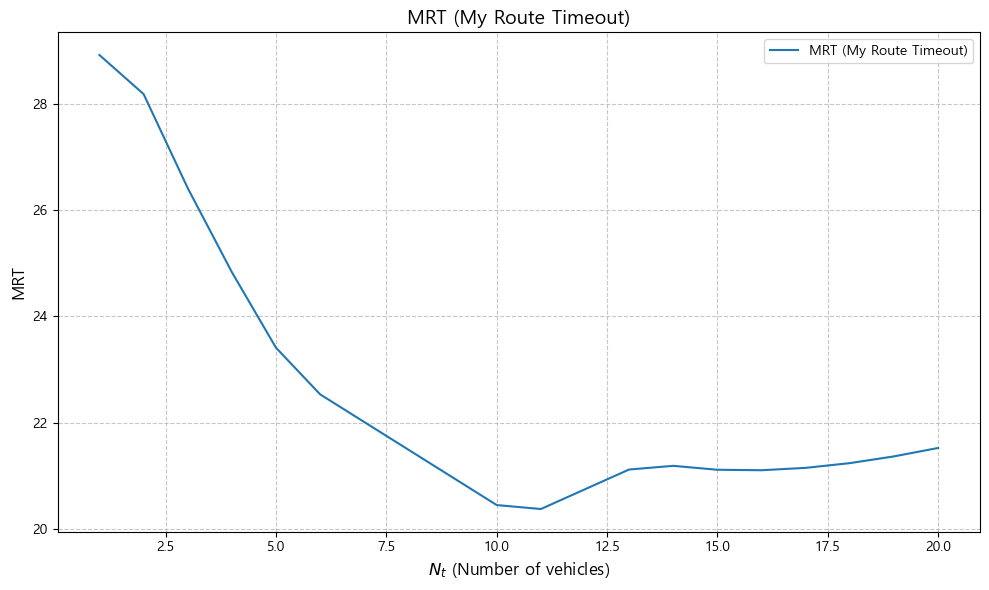

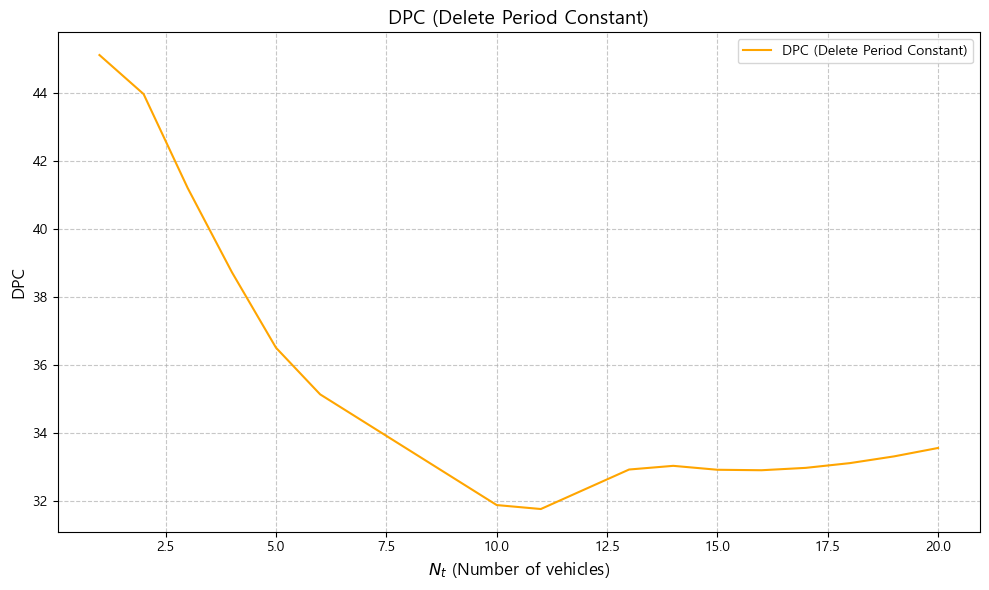

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

MRT_min = 5.0
MRT_max = 300.0
MRT_base = 250.0


DPC_min = 5.0
DPC_max = 500.0
DPC_base = 390.0



W_min = 0.01  # Minimum limit for W_rho_t
W_max = 0.10  # Maximum limit for W_rho_t
R = 0.8
N_t = np.arange(1, 21)
rho_t = N_t / (np.pi * R**2)
#S_prev = np.arange(30, 70, 2)

rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1) 



S_cur = np.arange(30, 70, 2)

adjustment = np.linspace(10, -10, len(S_cur)) 
S_prev = S_cur + adjustment
#S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
#S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)
S_avg = np.mean(S_cur)
delta_S = np.where(S_prev != 0, 1 - (np.abs(S_cur - S_prev) / S_prev), 0)

W_base_rho = 0.027
W_base_S = 0.037
F_change = 0.03
F_rho = -0.001

F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur)) 

diff = np.linspace(10, - 10, len(S_cur))


W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum(np.abs(rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum(np.abs(S_cur - S_avg) * 0.001, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)

F_rho_t = np.maximum(0.8, np.minimum(1.2, 8.0 / rho_t))

F_inter = 1.0 + (W_rho_t - W_S) * 0.05
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter

#print(W_S)
#print(W_rho_t)

#print(F_S)
#print(F_rho_t)

a = W_S #* F_S
b = W_rho_t * F_rho_t

df = S_avg - S_cur




plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()







# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_adjust, label="$F_{adjust}$", color="blue")


#plt.plot(N_t, W_S, label="$W_S$ (Speed Weight)", color="red", linestyle="--", linewidth=1)
#plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="green", linestyle="--", linewidth=1)

plt.plot(N_t, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(N_t, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)




plt.title("최종 조정 계수", fontsize=14)
#plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(N_t, MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_t, DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()



c:\Users\whdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


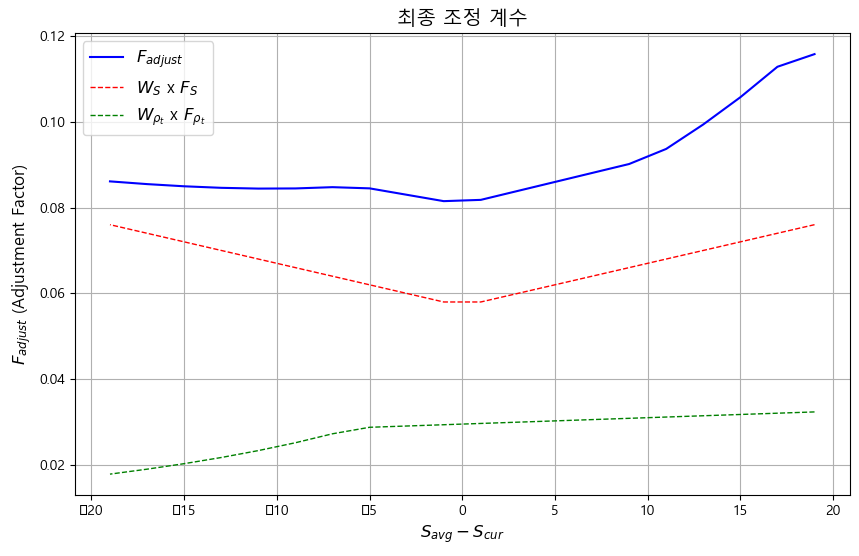

C:\Users\whdgu\AppData\Local\Temp\ipykernel_10820\3987502642.py:37: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()  # Adjust layout for label readability


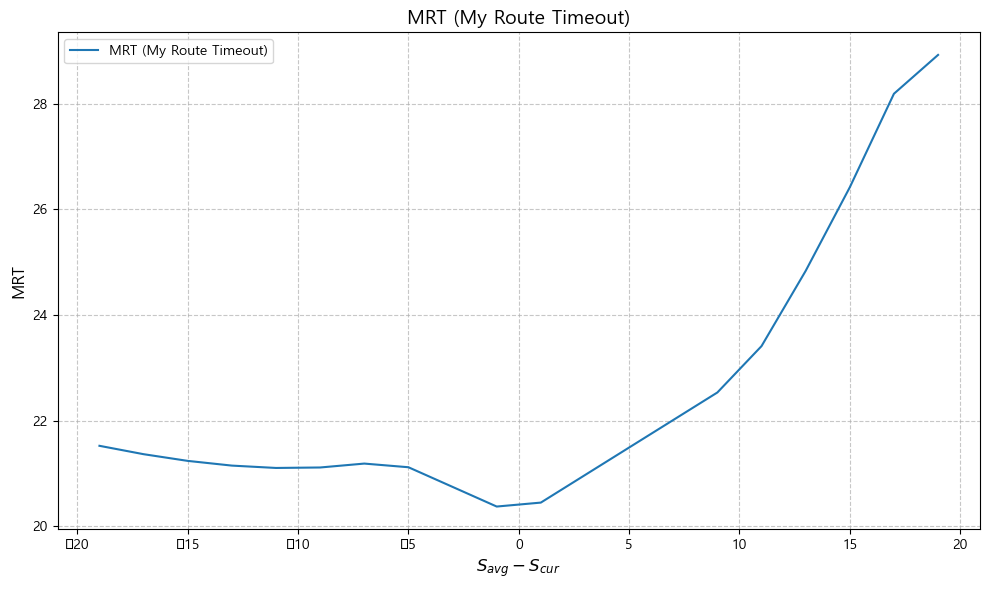

C:\Users\whdgu\AppData\Local\Temp\ipykernel_10820\3987502642.py:52: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()  # Adjust layout for label readability


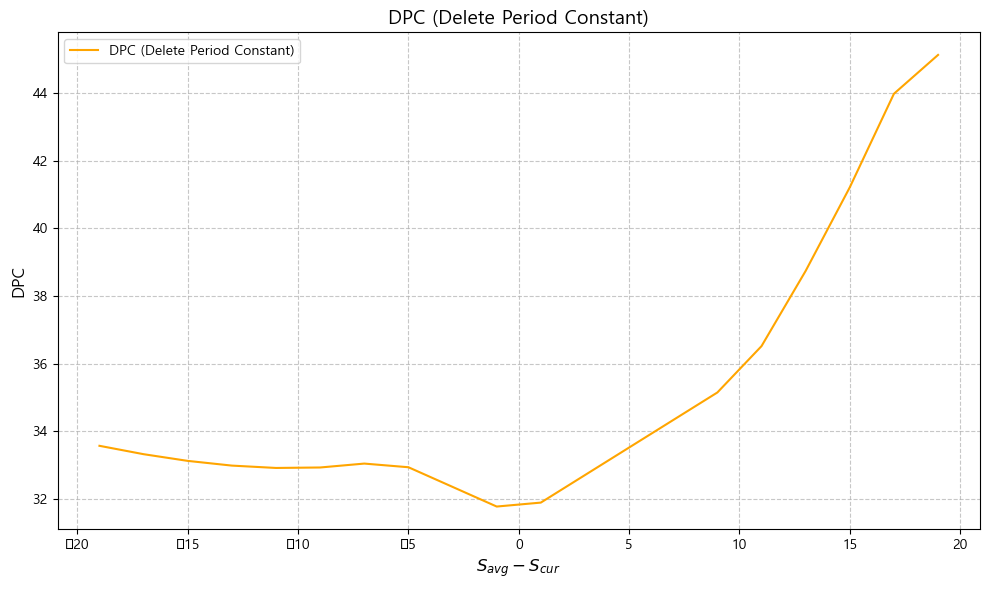

In [9]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df, F_adjust, label="$F_{adjust}$", color="blue")


#plt.plot(N_t, W_S, label="$W_S$ (Speed Weight)", color="red", linestyle="--", linewidth=1)
#plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="green", linestyle="--", linewidth=1)

plt.plot(df, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(df, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)




plt.title("최종 조정 계수", fontsize=14)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
#plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(df, MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(df, DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

# Set custom X-axis labels with 4 decimal places
#plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()

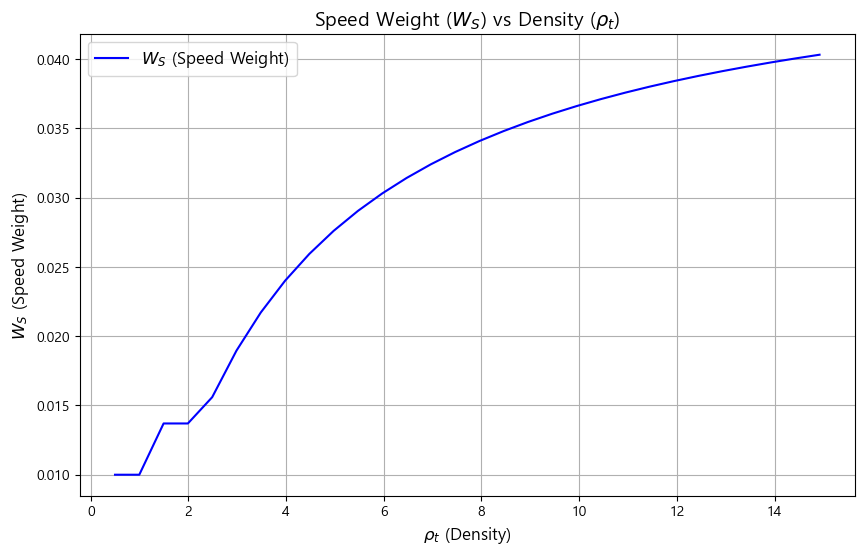

In [14]:
# Plot W_S (Speed Weight) vs rho_t (Density)
plt.figure(figsize=(10, 6))
plt.plot(rho_t, W_S[:len(rho_t)], label="$W_S$ (Speed Weight)", color="blue")
plt.title("Speed Weight ($W_S$) vs Density ($\\rho_t$)", fontsize=14)
plt.xlabel("$\\rho_t$ (Density)", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


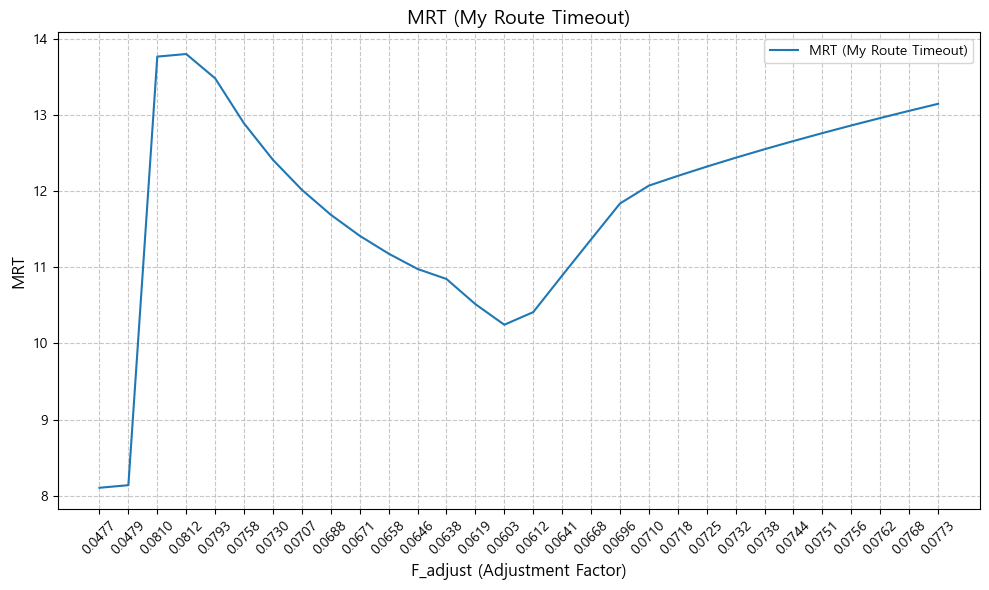

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Given data
data = T

# X-axis labels
x_labels = F_adjust

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
plt.xticks(ticks=range(len(x_labels)), labels=[f"{x:.4f}" for x in x_labels], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel('F_adjust (Adjustment Factor)', fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


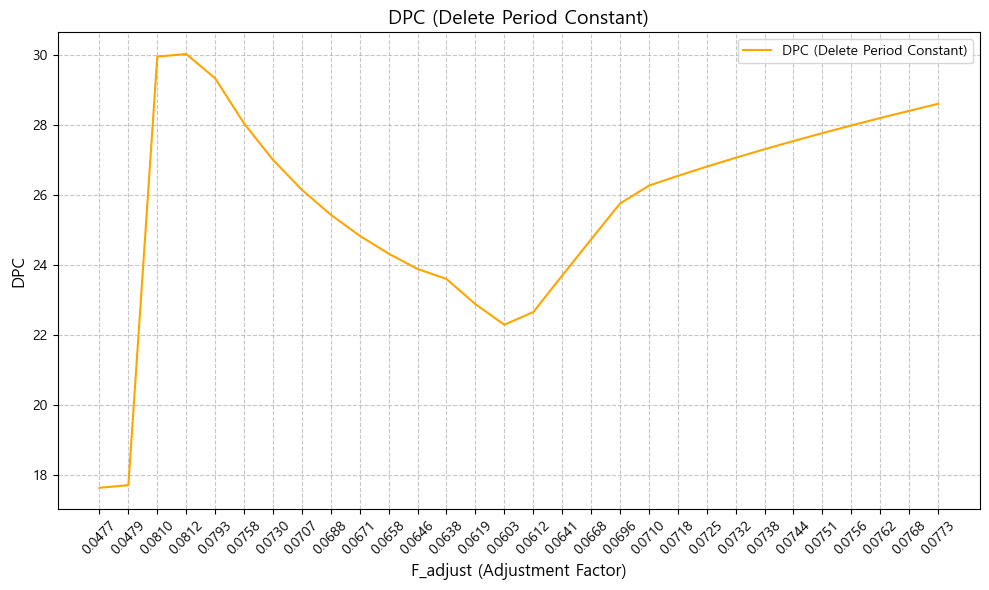

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Second dataset (Y-axis data)
data_2 = T_del

# Custom X-axis data (labels for the X-axis)
x_labels = F_adjust

# Plotting the second dataset
plt.figure(figsize=(10, 6))
plt.plot(data_2, marker=None, linestyle='-', color='orange', label='DPC (Delete Period Constant)')

# Set custom X-axis labels
plt.xticks(ticks=range(len(x_labels)), labels=[f"{x:.4f}" for x in x_labels], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('F_adjust (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()
